In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///./Resources/hawaii.sqlite")

In [28]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [49]:
# View all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [33]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


sqlalchemy.ext.automap.station

In [30]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [51]:
# Find the most recent date in the data set.
rec_date = session.query(func.max(Measurement.date)).all()
rec_date

[('2017-08-23')]

(array([-500.,    0.,  500., 1000., 1500., 2000., 2500.]),
 <a list of 7 Text xticklabel objects>)

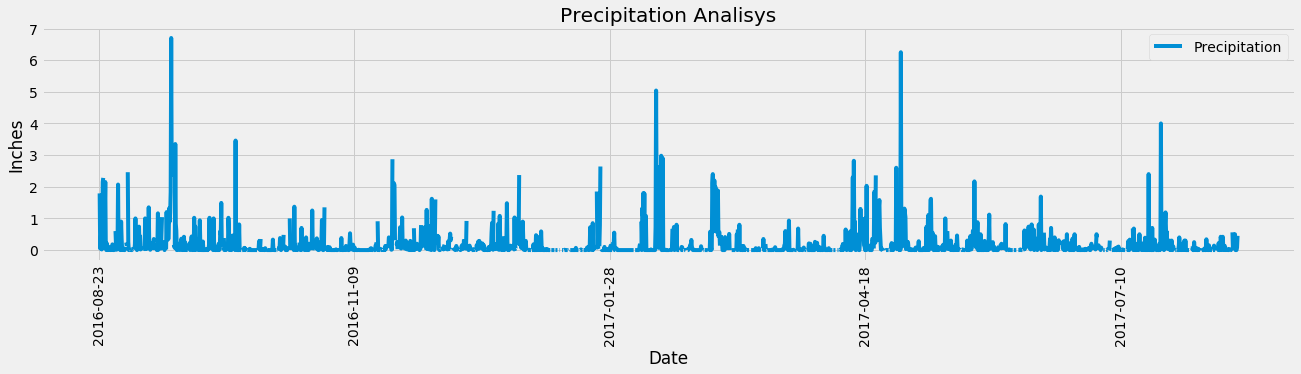

In [89]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

last_year = dt.date(2017,8,23)-dt.timedelta(days = 365)
last_year

# Perform a query to retrieve the date and precipitation scores

results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).all()
results


# Save the query results as a Pandas DataFrame and set the index to the date column

prcp_df = pd.DataFrame(results, columns = ["Date", "Precipitation"])
prcp_df.head()

# Sort the dataframe by date
prcp_df = prcp_df.sort_values("Date")
prcp_df


# Use Pandas Plotting with Matplotlib to plot the data

prcp_df.plot("Date", "Precipitation", figsize = (20, 4))
plt.title('Precipitation Analisys')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90)


In [63]:
# Use Pandas to calcualte the summary statistics for the precipitation data

prcp_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [65]:
# Design a query to calculate the total number stations in the dataset
session.query(func.count(Station.station)).all()


[(9)]

In [68]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [70]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()



[(54.0, 85.0, 71.66378066378067)]

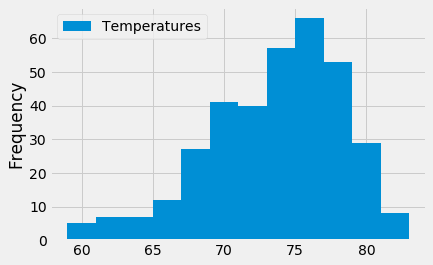

In [73]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.tobs). filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= last_year).all()

df = pd.DataFrame(temps, columns = ["Temperatures"])
df.plot.hist(bins = 12)



# Close session

In [74]:
# Close Session
session.close()